In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches - matches.csv')

In [40]:
new = deliveries.merge(matches, left_on='match_id', right_on="id")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          150460 non-null  int64  
 1   inning            150460 non-null  int64  
 2   batting_team      150460 non-null  object 
 3   bowling_team      150460 non-null  object 
 4   over              150460 non-null  int64  
 5   ball              150460 non-null  int64  
 6   batsman           150460 non-null  object 
 7   non_striker       150460 non-null  object 
 8   bowler            150460 non-null  object 
 9   is_super_over     150460 non-null  int64  
 10  wide_runs         150460 non-null  int64  
 11  bye_runs          150460 non-null  int64  
 12  legbye_runs       150460 non-null  int64  
 13  noball_runs       150460 non-null  int64  
 14  penalty_runs      150460 non-null  int64  
 15  batsman_runs      150460 non-null  int64  
 16  extra_runs        15

In [41]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [42]:
new['dismissal_kind'].value_counts()

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64

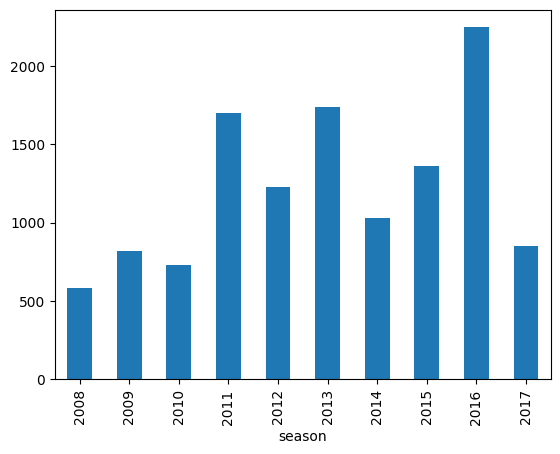

In [43]:
mask = new[deliveries['batsman'] == 'V Kohli']
mask.groupby('season')['ball'].sum().plot(kind='bar')
plt.show()

## seaborn

In [44]:
new[new['batsman'] == 'V Kohli'].drop_duplicates(subset=['season']).columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

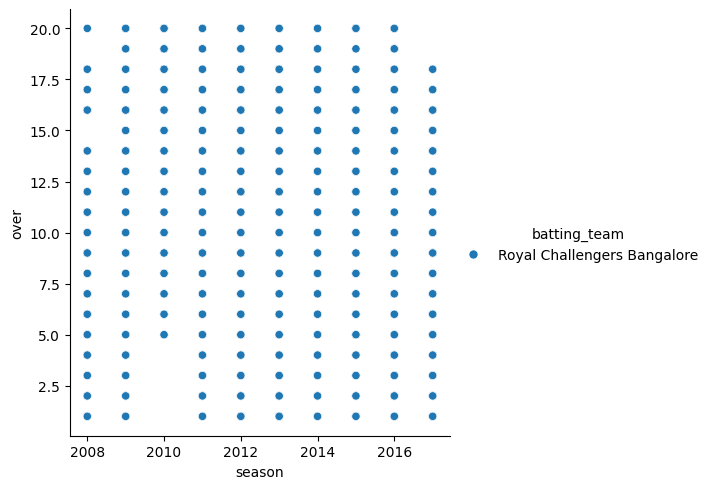

In [45]:
sns.relplot(x='season',y='over',data=mask,hue='batting_team')

In [46]:
mask = new[deliveries['batsman'] == 'V Kohli']
mask['batsman_runs'].shape
# plt.plot(mask['total_runs'])
# plt.plot(new['batsman'].value_counts())
# plt.grid()
# plt.show()

(3494,)